In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Reading and preparing data

In [3]:
path = "../01_data/01_raw/data.csv"
df = pd.read_csv(path)

In [4]:
print('number of datapoints')
len(df)

number of datapoints


11914

In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [18]:
string_columns = list(df.dtypes[df.dtypes == "object"].index)

In [19]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [20]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


Target variable analysis

<Axes: xlabel='msrp', ylabel='Count'>

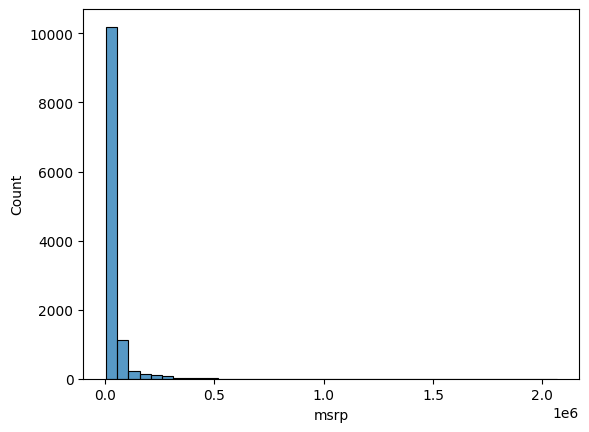

In [22]:
sns.histplot(df.msrp, bins=40)

<Axes: xlabel='msrp', ylabel='Count'>

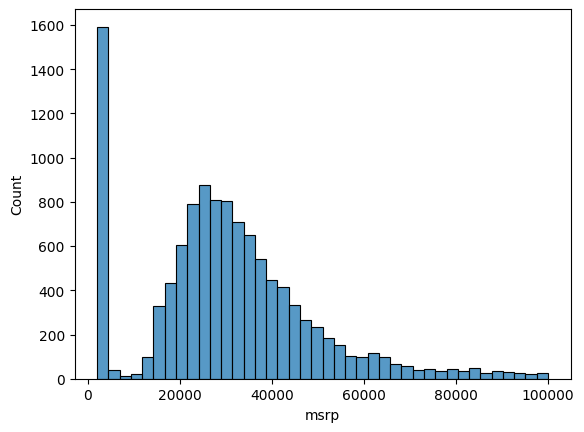

In [23]:
sns.histplot(df.msrp[df.msrp < 100000], bins=40)

<Axes: xlabel='msrp', ylabel='Count'>

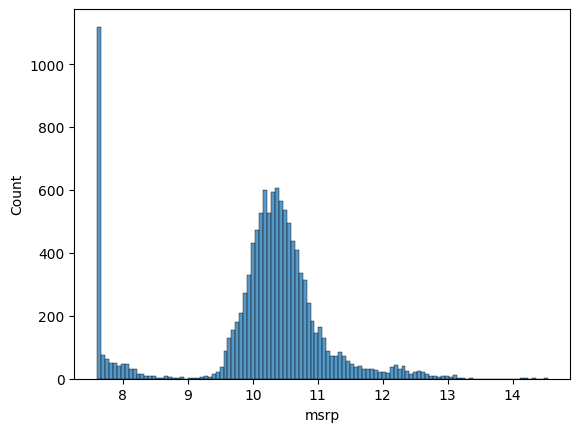

In [24]:
log_price = np.log1p(df.msrp)
sns.histplot(log_price)

Validation Framework

In [28]:
n = len(df)

In [32]:
n_val = int(0.2 * n) 
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [36]:
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

In [38]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [39]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [40]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

Baseline Solution

In [49]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg',
'popularity']
df_num = df_train[base]

In [54]:
df_num = df_num.fillna(0)

In [64]:
X_train = df_num.values

In [106]:
def train_linear_regression(X, y):
    # adding the dummy column
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # Normal equation formula
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.pinv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [107]:
w_o, w = train_linear_regression(X_train, y_train)

In [111]:
y_pred = w_o + X_train.dot(w)

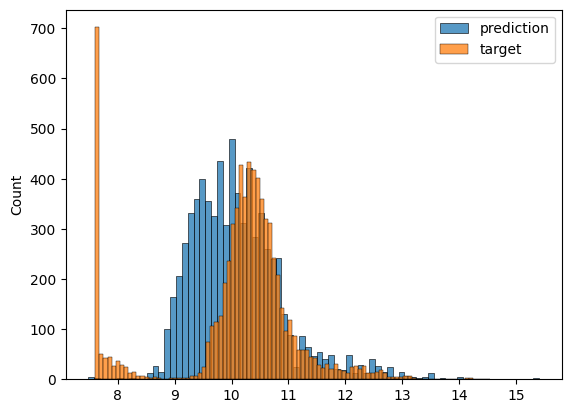

In [113]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.legend()